# Data Cleaning

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

Combine the both test and train 

In [2]:
combined = pd.concat((train,test), sort=False).reset_index(drop=True)
combined.drop(['SalePrice'],axis = 1,inplace = True)
combined.drop(['Id'],axis = 1,inplace = True)
combined.shape

(2919, 79)

In [3]:
cols_with_missing = [col for col in combined.columns if train[col].isnull().any()]
print("Columns that have missing value : ")
print(cols_with_missing)

Columns that have missing value : 
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [4]:
total = combined.isnull().sum().sort_values(ascending=False)
percent = (combined.isnull().sum()/combined.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
greater_than_20 = missing_data[missing_data.Percent > .20]
print('Columns which has more than 20% missing values :')
print(greater_than_20)

Columns which has more than 20% missing values :
             Total   Percent
PoolQC        2909  0.996574
MiscFeature   2814  0.964029
Alley         2721  0.932169
Fence         2348  0.804385
FireplaceQu   1420  0.486468


#### Deleting the colums which has more than 20% missing values

In [6]:
combined = combined.drop(greater_than_20.index,axis = 1)
print(f'Shape of data after deleting columns {combined.shape}.')

Shape of data after deleting columns (2919, 74).


#### We Still have some missing values

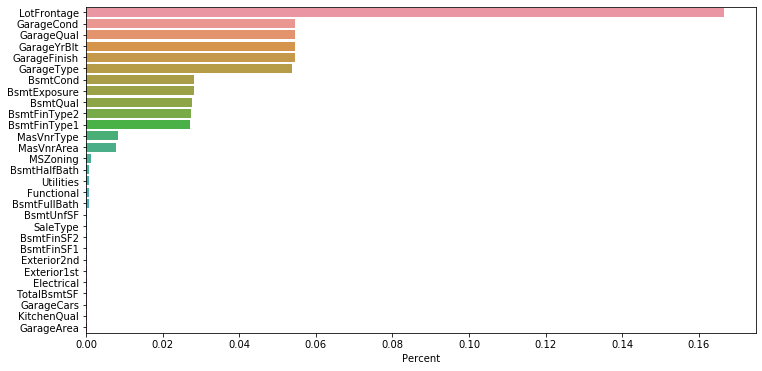

In [7]:
total = combined.isnull().sum().sort_values(ascending=False)
percent = (combined.isnull().sum()/combined.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing = missing_data [missing_data.Percent>0.0]
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Percent" , y=missing.index , data=missing)

In [8]:
allna = (combined.isnull().sum() / len(combined))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
NA=combined[allna.index.to_list()]
print(NA)

      BsmtUnfSF  GarageArea  GarageCars KitchenQual Electrical  TotalBsmtSF  \
0         150.0       548.0         2.0          Gd      SBrkr        856.0   
1         284.0       460.0         2.0          TA      SBrkr       1262.0   
2         434.0       608.0         2.0          Gd      SBrkr        920.0   
3         540.0       642.0         3.0          Gd      SBrkr        756.0   
4         490.0       836.0         3.0          Gd      SBrkr       1145.0   
5          64.0       480.0         2.0          TA      SBrkr        796.0   
6         317.0       636.0         2.0          Gd      SBrkr       1686.0   
7         216.0       484.0         2.0          TA      SBrkr       1107.0   
8         952.0       468.0         2.0          TA      FuseF        952.0   
9         140.0       205.0         1.0          TA      SBrkr        991.0   
10        134.0       384.0         1.0          TA      SBrkr       1040.0   
11        177.0       736.0         3.0          Ex 

Split the data Nan columns into the numerical and categorical 

In [9]:
NAcat = NA.select_dtypes(include="object")
NAnum = NA.select_dtypes(exclude="object")
print(f'We have {NAcat.shape[1]} categorical variables with missing values.')
print(f'We have {NAnum.shape[1]} numerical variables with missing values.')

We have 18 categorical variables with missing values.
We have 11 numerical variables with missing values.


#### Numerical Data

In [10]:
NAnum.head()

,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,GarageYrBlt,LotFrontage
0,150.0,548.0,2.0,856.0,0.0,706.0,0.0,1.0,196.0,2003.0,65.0
1,284.0,460.0,2.0,1262.0,0.0,978.0,1.0,0.0,0.0,1976.0,80.0
2,434.0,608.0,2.0,920.0,0.0,486.0,0.0,1.0,162.0,2001.0,68.0
3,540.0,642.0,3.0,756.0,0.0,216.0,0.0,1.0,0.0,1998.0,60.0
4,490.0,836.0,3.0,1145.0,0.0,655.0,0.0,1.0,350.0,2000.0,84.0


In [11]:
# we can make veneer area to be zero if it is missing
combined['MasVnrArea']=combined.MasVnrArea.fillna(0)
combined['LotFrontage']=combined.LotFrontage.fillna(combined.LotFrontage.median())
# if the year is missing then lets make it 1980
combined['GarageYrBlt']=combined["GarageYrBlt"].fillna(1980)

#### Categorical Data

In [12]:
NAcat.head()

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,No,Attchd,TA,RFn,TA
1,TA,SBrkr,WD,MetalSd,MetalSd,AllPub,Typ,RL,None,ALQ,Unf,Gd,TA,Gd,Attchd,TA,RFn,TA
2,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,Mn,Attchd,TA,RFn,TA
3,Gd,SBrkr,WD,Wd Sdng,Wd Shng,AllPub,Typ,RL,None,ALQ,Unf,TA,Gd,No,Detchd,TA,Unf,TA
4,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,Av,Attchd,TA,RFn,TA


In [13]:
ffill_cols = ['Electrical', 'SaleType', 'KitchenQual', 'Exterior1st','Exterior2nd', 'Functional', 'Utilities', 'MSZoning']
for col in combined[ffill_cols]:
        combined[col] = combined[col].fillna(method='ffill')
# if still some are remaing for saftey check again
NAcols=combined.columns
for col in NAcols:
    if combined[col].dtype == "object":
        combined[col] = combined[col].fillna("None")
for col in NAcols:
    if combined[col].dtype != "object":
        combined[col]= combined[col].fillna(0)

Last check to see if we have any missing values

In [14]:
combined.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

We are done with the missing values, now next is feature engineering

# Feature Engineering

Instead of having different areas, let's combine it into total area.

In [15]:
combined['Total_Area'] = combined['TotalBsmtSF'] + combined['1stFlrSF'] + combined['2ndFlrSF'] + combined['GrLivArea'] +combined['GarageArea']

Instead of having the half bath and full bath, let's combine both.

In [16]:
combined['Bathrooms'] = combined['FullBath'] + combined['HalfBath']*0.5

In [17]:
combined['MSSubClass'] = combined['MSSubClass'].apply(str)
combined['YrSold'] = combined['YrSold'].astype(str)

One-Hot Encoding

In [18]:
cb=pd.get_dummies(combined)
print(f"the shape of the original dataset {combined.shape}")
print(f"the shape of the encoded dataset {cb.shape}")
print(f"We have {cb.shape[1]- combined.shape[1]} new encoded features")

the shape of the original dataset (2919, 76)
the shape of the encoded dataset (2919, 300)
We have 224 new encoded features


In [19]:
Train = cb[:train.shape[0]]
Test = cb[train.shape[0]:]

# Outlier Detection

In [20]:
Train['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [21]:
Train['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110.0
Name: TotalBsmtSF, dtype: float64

In [22]:
Train['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [23]:
Train['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [24]:
Train['GarageArea'].sort_values(ascending=False).head(4)

1298    1418.0
581     1390.0
1190    1356.0
1061    1248.0
Name: GarageArea, dtype: float64

In [25]:
Train['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64

In [26]:
Train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]
target=train[['SalePrice']]
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

C:\Users\sachi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


After Removing the Outliers

In [27]:
print( 'Train: ',Train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

Train:  1457 rows
Target: 1457 rows


Saving the Train and Test in a new file

In [28]:
target["SalePrice"] = np.log1p(target["SalePrice"])
Train = pd.concat([Train,target],axis=1)
Train.to_csv('./Data/Cleaned_train.csv',index = False)
Test.to_csv('./Data/Cleaned_test.csv',index = False)